# Production Problem
This notebook contains a simple exercise of Mathematic Programming taken from the course "INTRODUCCIÓN A LA PROGRAMACIÓN MATEMÁTICA" from the UNED.

Statement
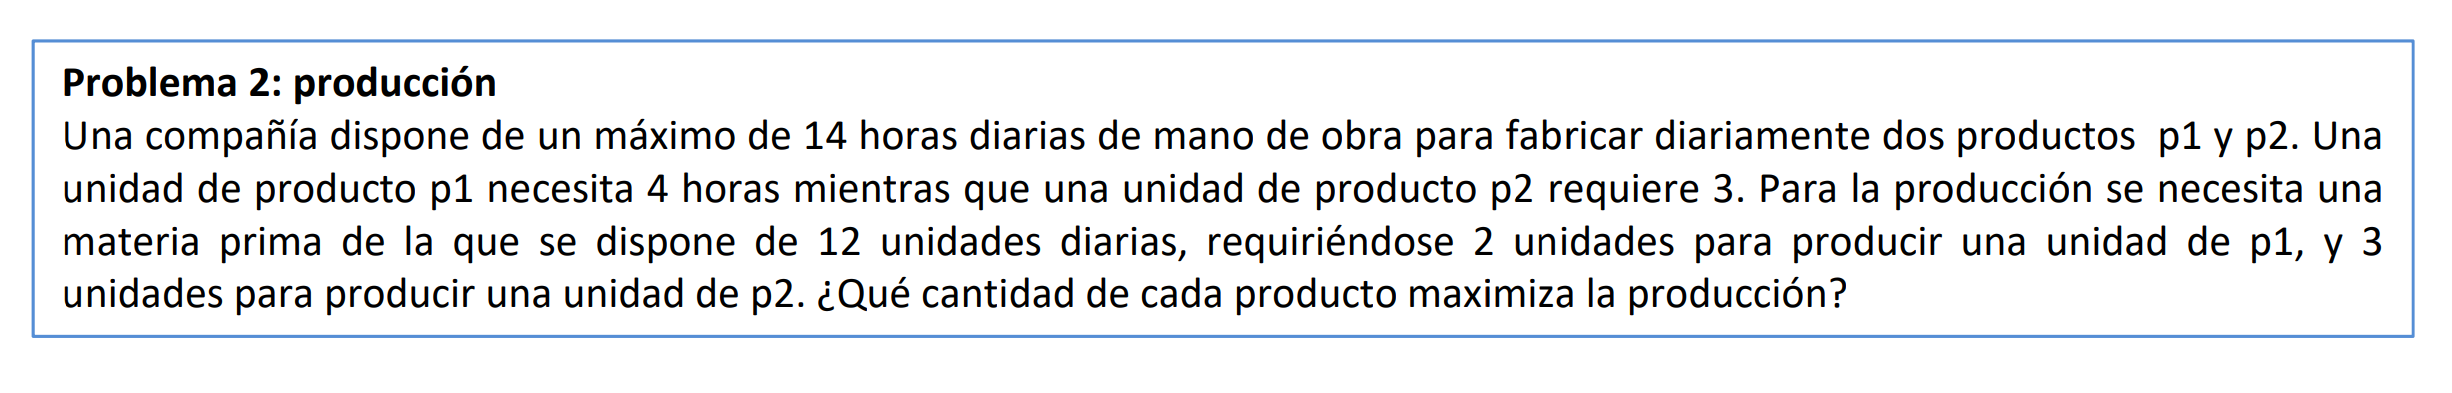

# Step 1: Define decision variables
The decision variables are the quantity of items to be produced for each category (**p1** and **p2**):
- quantity_p1 ([0, ∞)
- quantity_p2  [0, ∞)

In [1]:
from mip import *

m = Model(sense=MAXIMIZE, solver_name=CBC)
m.threads = -1 # Use all cores Available

quantity_p1 = m.add_var(name='Quantity produced of p1', var_type=INTEGER, lb=0)
quantity_p2 = m.add_var(name='Quantity produced of p2', var_type=INTEGER, lb=0)


# Step 2: Define the restrictions
The restrictions are given by the limited amount of resources that are available:

- 14 hours of workforce implies that quantity_p1\*4 + quantity_p2\*3 <= 14
- 12 units of raw input material implies that quantity_p1\*2 + quantity_p2\*3 <= 12

In [2]:
workforce_restriction = quantity_p1*4 + quantity_p2*3 <= 14
rawMat_restriction = quantity_p1*2 + quantity_p2*3 <= 12

m.add_constr(workforce_restriction, name="workforce_restriction")
m.add_constr(rawMat_restriction, name="rawMat_restriction")

# Step 3: Define the Objective Function
In this scenario what needs to be obtimized is the amount of elements produced. Therefore, the objective functions is the following:

    maximize(quantity_p1+quantity_p2)

In [3]:
obj_function = maximize(quantity_p1+quantity_p2)

m.objective = obj_function

# Step 4: Ejecutar el optimizador y analizar resultados
The decision variables are shown along their optimal values using a DataFrame from Pandas.

In [4]:
status = m.optimize()

import pandas as pd

df_data = [{"Nombre variable": var.name, "Valor optimizado": var.x} for var in m.vars]
solution_df = pd.DataFrame(df_data)
solution_df

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp1000I sum of infeasibilities 1.55644e-11 - average 7.78222e-12, 0 fixed columns
Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 4.3333333
Clp0000I Optimal - objective value 4.3333333
Clp0000I Optimal - objective value 4.3333333
Clp0032I Optimal objective 4.333333333 - 0 iterations time 0.002, Idiot 0.00

Starting MIP optimization


,Nombre variable,Valor optimizado
0,Quantity produced of p1,1.0
1,Quantity produced of p2,3.0
